In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from PIL import Image
import requests
from io import BytesIO
from highlight_text import htext
import os

from matplotlib import font_manager as fm,rcParams

In [2]:
df = pd.read_csv("pl_goal_summary_data.csv")
df.head(20)

,season_id,team,goals_for,goals_against,goal_diff,team_season
0,2010,Arsenal,72,43,29,Arsenal 2010/2011
1,2010,Aston Villa,48,59,-11,Aston Villa 2010/2011
2,2010,Birmingham,37,58,-21,Birmingham 2010/2011
3,2010,Blackburn,46,59,-13,Blackburn 2010/2011
4,2010,Blackpool,55,78,-23,Blackpool 2010/2011
5,2010,Bolton,52,56,-4,Bolton 2010/2011
6,2010,Chelsea,69,33,36,Chelsea 2010/2011
7,2010,Everton,51,45,6,Everton 2010/2011
8,2010,Fulham,49,43,6,Fulham 2010/2011
9,2010,Liverpool,59,44,15,Liverpool 2010/2011


findfont: Font family ['Merriweather'] not found. Falling back to DejaVu Sans.


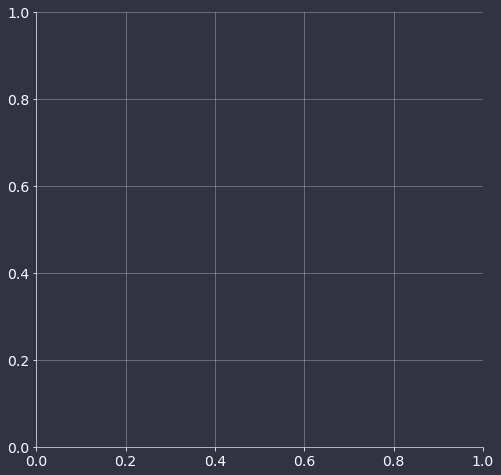

In [3]:
mpl.rcParams["figure.facecolor"] = "#313343"
mpl.rcParams["axes.facecolor"] = "#313343"
mpl.rcParams["savefig.facecolor"] = "#313343"
mpl.rcParams["axes.labelcolor"] = "w"
mpl.rcParams["font.family"] = "Merriweather"
mpl.rcParams["xtick.color"] = "w"
mpl.rcParams["xtick.labelsize"] = 14
mpl.rcParams["ytick.color"] = "w"
mpl.rcParams["ytick.labelsize"] = 14
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 500
mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['figure.figsize'] = (8,8)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'lightgrey'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['grid.alpha'] = 0.7
mpl.rcParams['axes.edgecolor'] = 'lightgrey'
mpl.rcParams['figure.frameon'] = True
fig, ax = plt.subplots()

<ipython-input-4-1a8ec52f8f52>:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


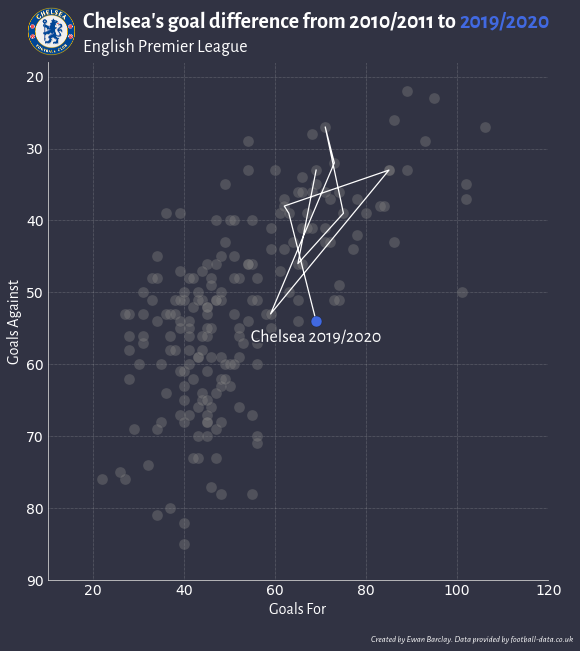

In [4]:
team = "Chelsea"

filler = "grey"
primary = "royalblue"
background = "#313343"
text_color = "w"

fpath = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Alegreya_Sans\AlegreyaSans-Regular.ttf")
title_font = fm.FontProperties(fname=fpath)
fpath2 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Alegreya_Sans\AlegreyaSans-Bold.ttf")
bold_font = fm.FontProperties(fname=fpath2)
fpath3 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Alegreya_Sans\AlegreyaSans-Italic.ttf")
italic_font = fm.FontProperties(fname=fpath3)

#creating figure and axes
fig,ax = plt.subplots(figsize=(8,8))

#adding a grid
ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)

#getting data
x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120,color=filler,edgecolors=background,alpha=0.4,lw=0.5,zorder=2)

#getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

#plotting a line to track team's change over seasons
ax.plot(x,y,color=text_color,lw=1.25,zorder=3)

#plotting team's most recent season
ax.scatter(x[-1],y[-1], s=120,color=primary,edgecolors="black",lw=.25,zorder=4)
t = ax.text(x[-1],y[-1]+1,t[-1],color="w",ha="center",va= "top",fontproperties=title_font,size=18)
t.set_path_effects([path_effects.withStroke(linewidth=3, foreground=background)])

#adding title and subtitle
ssn_start = df[df.team == team].season_id.iloc[0]
ssn_end = df[df.team == team].season_id.iloc[-1]

ssn_start = str(ssn_start)+"/"+str(ssn_start+1)
ssn_end = str(ssn_end)+"/"+str(ssn_end+1)

#highlight_textprops =\
#[{"fontsize": 22, 'color': primary,"weight": "bold"},
 #{"fontsize": 22, "color": primary,"weight": "bold"},
 #{"fontsize": 22, "color": primary, "weight": "bold"}]

s= "{}'s goal difference from {} to <{}>\n"
htext.fig_text(0.15,1.07,s.format(team,ssn_start,ssn_end),
               highlight_textprops=[{"color": 'royalblue', "weight": 'bold',"fontsize": 22}],color = text_color,fontproperties=bold_font, size = 22,weight = "bold")


fig.text(0.15,1,"English Premier League".format(team),
         color="w",fontproperties=title_font,size = 18)

#adding x and y labels
ax.set_xlabel("Goals For",fontweight="bold",color=text_color,fontproperties=title_font,size=16)
ax.set_ylabel("Goals Against",color=text_color,fontproperties=title_font, size=16,weight="bold")

ax.set_ylim(90,18)
ax.set_xlim(10,120)

#remove pips
ax.tick_params(axis="both",length=0)

#adding logo
ax2= fig.add_axes([0.02,0.96,0.15,0.15])
ax2.axis("off")
url = "https://logos-world.net/wp-content/uploads/2020/05/Chelsea-Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)


#adding credits
fig.text(0.65,-0.025,"Created by Ewan Barclay. Data provided by football-data.co.uk",
        fontstyle="italic",fontproperties=italic_font,size=9,color=text_color)

plt.tight_layout()
plt.savefig("plots/Chelsea_gd_dark", bbox_inches="tight", facecolor=background, edgecolor=background, dpi=300)
plt.show()

<ipython-input-5-aba7066e3012>:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


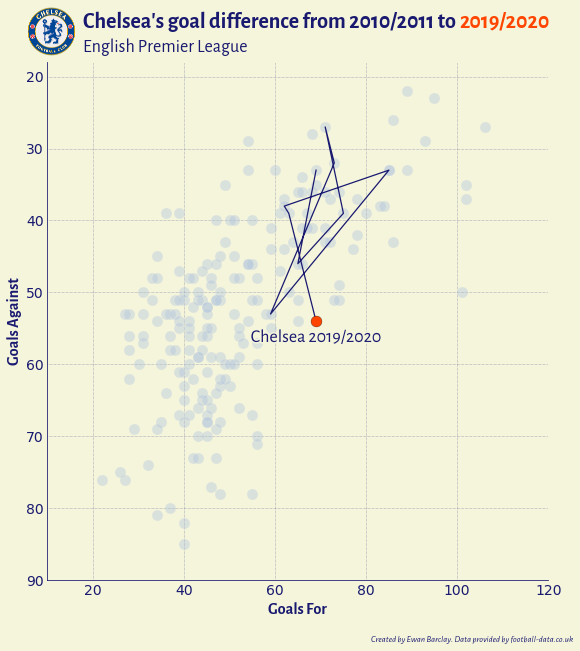

In [5]:
team = "Chelsea"

filler = "lightsteelblue"
primary = "orangered"
background = "beige"
text_color = "midnightblue"

ffpath = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Alegreya_Sans\AlegreyaSans-Regular.ttf")
title_font1 = fm.FontProperties(fname=ffpath)
ffpath2 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Alegreya_Sans\AlegreyaSans-Bold.ttf")
bold_font1 = fm.FontProperties(fname=ffpath2)
ffpath3 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Alegreya_Sans\AlegreyaSans-Italic.ttf")
italic_font1 = fm.FontProperties(fname=ffpath3)

#creating figure and axes
fig,ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)
#adding a grid
ax.grid(ls="dotted",lw=0.5,color=text_color,zorder=1)

#getting data
x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120,color=filler,edgecolors=background,alpha=0.4,lw=0.5,zorder=2)

#getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

#plotting a line to track team's change over seasons
ax.plot(x,y,color=text_color,lw=1.25,zorder=3)

#plotting team's most recent season
ax.scatter(x[-1],y[-1], s=120,color=primary,edgecolors="black",lw=.25,zorder=4)
t = ax.text(x[-1],y[-1]+1,t[-1],color=text_color,ha="center",va= "top",fontproperties=title_font1,size=18)
t.set_path_effects([path_effects.withStroke(linewidth=3, foreground=background)])

#adding title and subtitle
ssn_start = df[df.team == team].season_id.iloc[0]
ssn_end = df[df.team == team].season_id.iloc[-1]

ssn_start = str(ssn_start)+"/"+str(ssn_start+1)
ssn_end = str(ssn_end)+"/"+str(ssn_end+1)

#highlight_textprops =\
#[{"fontsize": 22, 'color': primary,"weight": "bold"},
 #{"fontsize": 22, "color": primary,"weight": "bold"},
 #{"fontsize": 22, "color": primary, "weight": "bold"}]

s= "{}'s goal difference from {} to <{}>\n"
htext.fig_text(0.15,1.07,s.format(team,ssn_start,ssn_end),
               highlight_textprops=[{"color": primary, "weight": 'bold',"fontsize": 22}],color = text_color,fontproperties=bold_font1, size = 22,weight = "bold")


fig.text(0.15,1,"English Premier League".format(team),
         color=text_color,fontproperties=title_font1,size = 18)

#adding x and y labels
ax.set_xlabel("Goals For",fontweight="bold",color=text_color,fontproperties=bold_font1,size=16)
ax.set_ylabel("Goals Against",color=text_color,fontproperties=bold_font1, size=16,weight="bold")

ax.set_ylim(90,18)
ax.set_xlim(10,120)

#remove pips
ax.tick_params(axis="both",length=0, colors = text_color)

#set colour of spines
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

#adding logo
ax2= fig.add_axes([0.02,0.96,0.15,0.15])
ax2.axis("off")
url = "https://logos-world.net/wp-content/uploads/2020/05/Chelsea-Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)


#adding credits
fig.text(0.65,-0.025,"Created by Ewan Barclay. Data provided by football-data.co.uk",
        fontstyle="italic",fontproperties=italic_font1,size=9,color=text_color)

plt.tight_layout()
plt.savefig("plots/Chelsea_gd_Alegreya", bbox_inches="tight", facecolor=background, edgecolor=background, dpi=300)
plt.show()

<ipython-input-6-64ccf51da9a5>:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


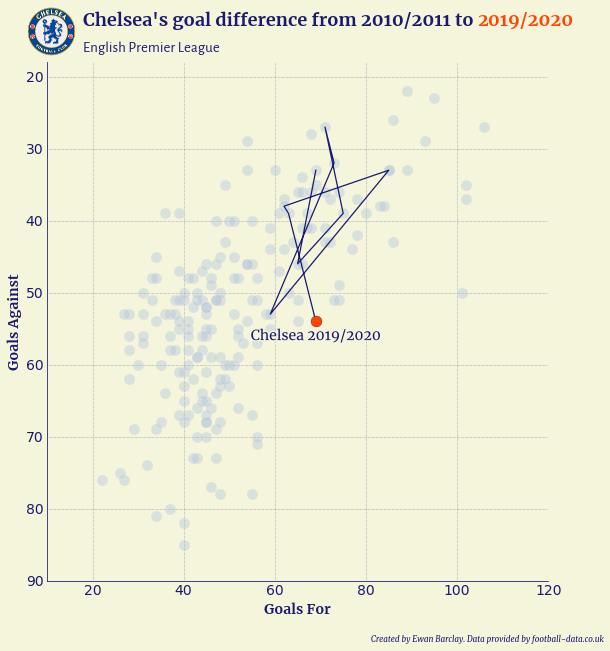

In [6]:
team = "Chelsea"

filler = "lightsteelblue"
primary = "orangered"
background = "beige"
text_color = "midnightblue"

fffpath = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Merriweather\Merriweather-Regular.ttf")
title_font2 = fm.FontProperties(fname=fffpath)
fffpath2 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Merriweather\Merriweather-Bold.ttf")
bold_font2 = fm.FontProperties(fname=fffpath2)
fffpath3 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Merriweather\Merriweather-Italic.ttf")
italic_font2 = fm.FontProperties(fname=fffpath3)

#creating figure and axes
fig,ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)
#adding a grid
ax.grid(ls="dotted",lw=0.5,color=text_color,zorder=1)

#getting data
x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120,color=filler,edgecolors=background,alpha=0.4,lw=0.5,zorder=2)

#getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

#plotting a line to track team's change over seasons
ax.plot(x,y,color=text_color,lw=1.25,zorder=3)

#plotting team's most recent season
ax.scatter(x[-1],y[-1], s=120,color=primary,edgecolors="black",lw=.25,zorder=4)
t = ax.text(x[-1],y[-1]+1,t[-1],color=text_color,ha="center",va= "top",fontproperties=title_font2,size=14)
t.set_path_effects([path_effects.withStroke(linewidth=3, foreground=background)])

#adding title and subtitle
ssn_start = df[df.team == team].season_id.iloc[0]
ssn_end = df[df.team == team].season_id.iloc[-1]

ssn_start = str(ssn_start)+"/"+str(ssn_start+1)
ssn_end = str(ssn_end)+"/"+str(ssn_end+1)

#highlight_textprops =\
#[{"fontsize": 22, 'color': primary,"weight": "bold"},
 #{"fontsize": 22, "color": primary,"weight": "bold"},
 #{"fontsize": 22, "color": primary, "weight": "bold"}]

s= "{}'s goal difference from {} to <{}>\n"
htext.fig_text(0.15,1.07,s.format(team,ssn_start,ssn_end),
               highlight_textprops=[{"color": primary, "weight": 'bold',"fontsize": 18}],color = text_color,fontproperties=bold_font2, size = 18,weight = "bold")


fig.text(0.15,1,"English Premier League".format(team),
         color=text_color,fontproperties=title_font,size = 15)

#adding x and y labels
ax.set_xlabel("Goals For",fontweight="bold",color=text_color,fontproperties=bold_font2,size=14)
ax.set_ylabel("Goals Against",color=text_color,fontproperties=bold_font2, size=14,weight="bold")

ax.set_ylim(90,18)
ax.set_xlim(10,120)

#remove pips
ax.tick_params(axis="both",length=0, colors = text_color)

#set colour of spines
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

#adding logo
ax2= fig.add_axes([0.02,0.96,0.15,0.15])
ax2.axis("off")
url = "https://logos-world.net/wp-content/uploads/2020/05/Chelsea-Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)


#adding credits
fig.text(0.65,-0.025,"Created by Ewan Barclay. Data provided by football-data.co.uk",
        fontstyle="italic",fontproperties=italic_font2,size=8,color=text_color)

plt.tight_layout()
plt.savefig("plots/Chelsea_gd_Merriweather", bbox_inches="tight", facecolor=background, edgecolor=background, dpi=300)
plt.show()

<ipython-input-7-3dd9668f7c73>:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


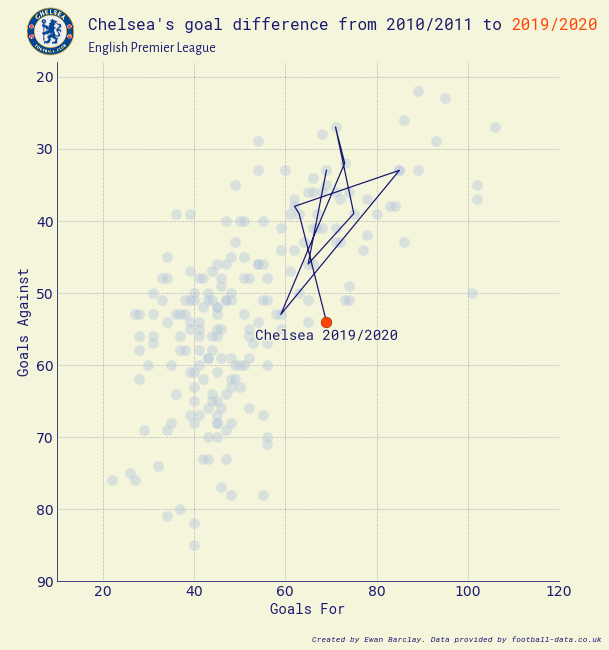

In [7]:
team = "Chelsea"

filler = "lightsteelblue"
primary = "orangered"
background = "beige"
text_color = "midnightblue"
#rcParams["font.style"] = 'oblique'

ffffpath = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Roboto_Mono\RobotoMono-VariableFont_wght.ttf")
title_font3 = fm.FontProperties(fname=ffffpath)
#fpath2 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Merriweather\Merriweather-Bold.ttf")
#bold_font = fm.FontProperties(fname=fpath2)
ffffpath3 = os.path.join(rcParams['datapath'],r"C:\Users\Ewan Barclay\Downloads\Roboto_Mono\RobotoMono-Italic-VariableFont_wght.ttf")
italic_font3 = fm.FontProperties(fname=ffffpath3)

#creating figure and axes
fig,ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)
#adding a grid
ax.grid(ls="dotted",lw=0.5,color=text_color,zorder=1)

#getting data
x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120,color=filler,edgecolors=background,alpha=0.4,lw=0.5,zorder=2)

#getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

#plotting a line to track team's change over seasons
ax.plot(x,y,color=text_color,lw=1.25,zorder=3)

#plotting team's most recent season
ax.scatter(x[-1],y[-1], s=120,color=primary,edgecolors="black",lw=.25,zorder=4)
t = ax.text(x[-1],y[-1]+1,t[-1],color=text_color,ha="center",va= "top",fontproperties=title_font3,size=14)
t.set_path_effects([path_effects.withStroke(linewidth=3, foreground=background)])

#adding title and subtitle
ssn_start = df[df.team == team].season_id.iloc[0]
ssn_end = df[df.team == team].season_id.iloc[-1]

ssn_start = str(ssn_start)+"/"+str(ssn_start+1)
ssn_end = str(ssn_end)+"/"+str(ssn_end+1)

#highlight_textprops =\
#[{"fontsize": 22, 'color': primary,"weight": "bold"},
 #{"fontsize": 22, "color": primary,"weight": "bold"},
 #{"fontsize": 22, "color": primary, "weight": "bold"}]

s= "{}'s goal difference from {} to <{}>\n"
htext.fig_text(0.14,1.06,s.format(team,ssn_start,ssn_end),
               highlight_textprops=[{"color": primary, "weight": 'bold',"fontsize": 16}],color = text_color,fontproperties=title_font3, size = 16,style = "oblique")


fig.text(0.14,1,"English Premier League".format(team),
         color=text_color,fontproperties=title_font,size = 14)

#adding x and y labels
ax.set_xlabel("Goals For",fontweight="bold",color=text_color,fontproperties=title_font3,size=14)
ax.set_ylabel("Goals Against",color=text_color,fontproperties=title_font3, size=14,weight="bold")

ax.set_ylim(90,18)
ax.set_xlim(10,120)

#remove pips
ax.tick_params(axis="both",length=0, colors = text_color)

#set colour of spines
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

#adding logo
ax2= fig.add_axes([0.0,0.96,0.15,0.15])
ax2.axis("off")
url = "https://logos-world.net/wp-content/uploads/2020/05/Chelsea-Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)


#adding credits
fig.text(0.53,-0.025,"Created by Ewan Barclay. Data provided by football-data.co.uk",
        fontstyle="italic",fontproperties=italic_font3,size=8,color=text_color)

plt.tight_layout()
plt.savefig("plots/Chelsea_gd_RobotoMono", bbox_inches="tight", facecolor=background, edgecolor=background, dpi=300)
plt.show()